In [1]:
#!pip3 install mplfinance
#!pip3 install html5lib

#### 참고자료 링크 : https://bonghanwith.tistory.com/194

#### plot style: https://github.com/matplotlib/mplfinance/blob/master/examples/styles.ipynb

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import mplfinance as mpf
import html5lib
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates

In [2]:
url = "https://finance.naver.com/item/sise_day.nhn?code=000660&page=1"
html = BeautifulSoup(requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text, "lxml")
pgrr = html.find('td', class_ = 'pgRR')
s = str(pgrr.a['href']).split('=')
last_page = s[-1]

In [3]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=000660&page=1'
with requests.get(url, headers={'User-agent': 'Mozilla/5.0'}) as doc: # <== 이처럼 브라우저 정보를 requests 모듈을 이용해 전송해야 한다.
    html = BeautifulSoup(doc.text, "lxml")
    pgrr = html.find('td', class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]
    print(last_page)

609


In [4]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=000660'

for page in range(1, int(last_page)+1):
    page_url = '{}&page={}'.format(sise_url, page)
    response_page = requests.get(page_url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = df.append(pd.read_html(response_page)[0])

df = df.dropna() # n/a 제거
df = df.reset_index(drop=True) # 인덱스 리셋

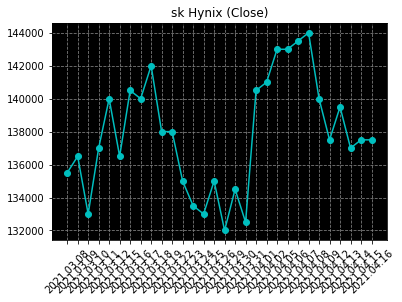

In [5]:
# 3. 30일 간 종가 추이 확인(그래프)
df = df.iloc[0:30]
df = df.sort_values(by = '날짜')
plt.title('sk Hynix (Close)')
plt.xticks(rotation=45)
plt.plot(df['날짜'], df['종가'], 'co-')
ax = plt.gca()
ax.set_facecolor('k')
plt.grid(color='gray', linestyle='--')
plt.show()

In [6]:
# 4. 캔들차트 작성
df = df.rename(columns={'날짜': 'Date', '시가': 'Open', '고가': 'High', '저가': 'Low', '종가': 'Close', '거래량': 'Volume'})
df = df.sort_values(by = 'Date')
df.index = pd.to_datetime(df.Date)

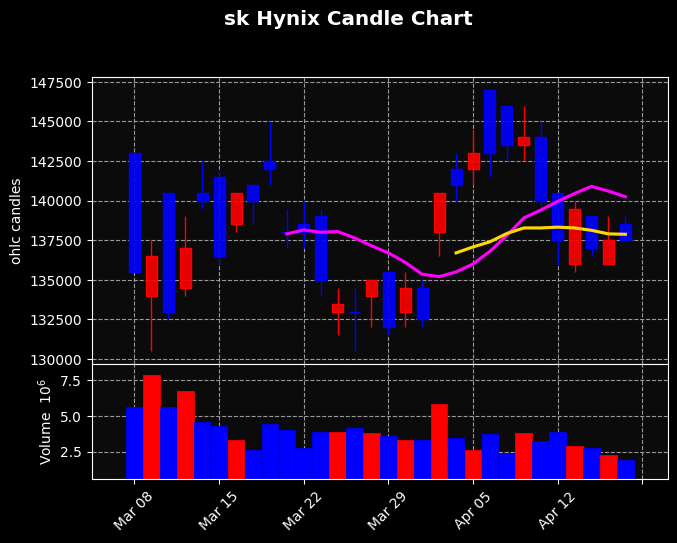

In [14]:
#이 코드 실행 시 위 코드 실행 에러(drop column)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# mav : moving average 이동산술평균
kwargs = dict(title='sk Hynix Candle Chart', type='candle', mav=(0, 10, 20), volume=True, ylabel='ohlc candles')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='nightclouds',marketcolors=mc)
mpf.plot(df, **kwargs, style=s)